# Experiment No.3

## PCA

### 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Creating Sample dataset

In [3]:
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


### 3. Standardize data

In [4]:
x=df.drop('Gender',axis=1)
y=df['Gender']

In [5]:
x

,Height,Weight,Age
0,170,65,30
1,165,59,25
2,180,75,35
3,175,68,28
4,160,55,22
5,172,70,32
6,168,62,27
7,177,74,33
8,162,58,24
9,158,54,21


In [6]:
y

,Gender
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,1
8,0
9,0


In [7]:
scaler= StandardScaler()
x_scaled=scaler.fit_transform(x)

In [8]:
x_scaled

array([[ 0.18419807,  0.13867505,  0.50910379],
       [-0.52425605, -0.69337525, -0.59764358],
       [ 1.60110632,  1.52542554,  1.61585117],
       [ 0.8926522 ,  0.5547002 ,  0.06640484],
       [-1.23271018, -1.24807544, -1.26169201],
       [ 0.46757972,  0.83205029,  0.95180275],
       [-0.09918358, -0.2773501 , -0.15494463],
       [ 1.17603385,  1.38675049,  1.17315222],
       [-0.94932853, -0.83205029, -0.81899306],
       [-1.51609183, -1.38675049, -1.48304149]])

### 4. Applying PCA

In [31]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(x_scaled)

### 6. Splitting Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

### 7. Fitting Data to model

In [33]:
model_0=LogisticRegression()
model_0.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred=model_0.predict(X_test)

### 8. Evaluating model using Confusion matrix

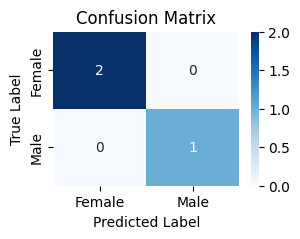

In [35]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

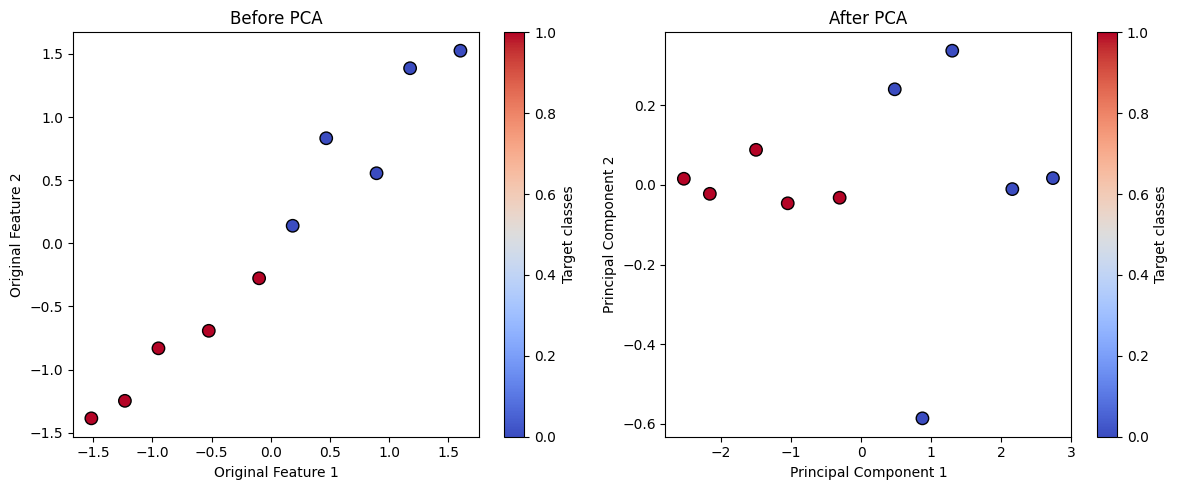

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sc1 = axes[0].scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
axes[0].set_xlabel('Original Feature 1')
axes[0].set_ylabel('Original Feature 2')
axes[0].set_title('Before PCA')
fig.colorbar(sc1, ax=axes[0], label='Target classes')

sc2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].set_title('After PCA')
fig.colorbar(sc2, ax=axes[1], label='Target classes')

plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)



R² Score: 1.0
